In [1]:
import pandas as pd 
import numpy as np
from sklearn import tree

In [2]:
df = pd.read_csv('heart failure.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
import seaborn as sns

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

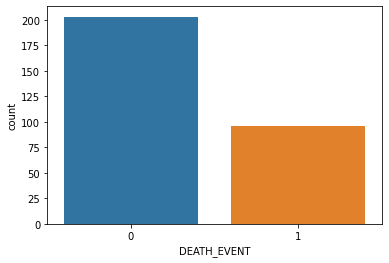

In [5]:
sns.countplot(x='DEATH_EVENT', data=df)

In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<AxesSubplot:>

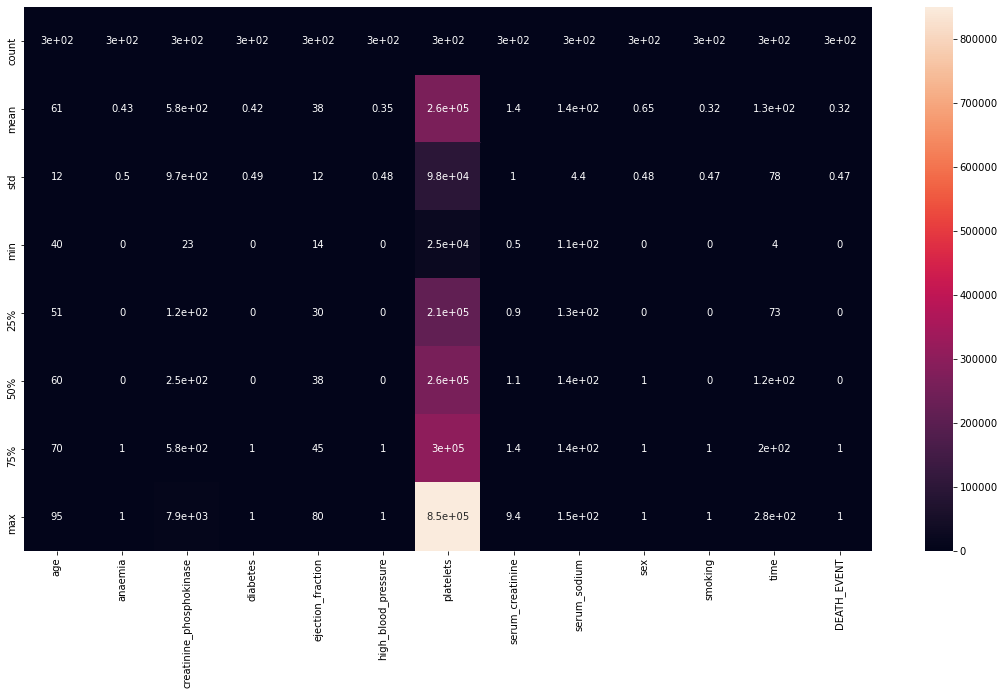

In [7]:
from matplotlib import pyplot as plt
plt.figure(figsize=(19,10))
sns.heatmap(df.describe(), annot=True)

In [8]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

<AxesSubplot:xlabel='diabetes', ylabel='count'>

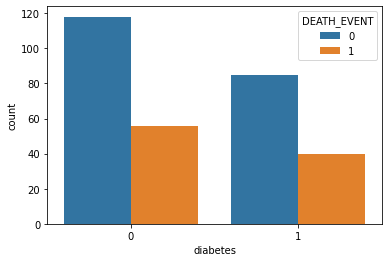

In [9]:
sns.countplot(x='diabetes',hue='DEATH_EVENT', data=df)

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

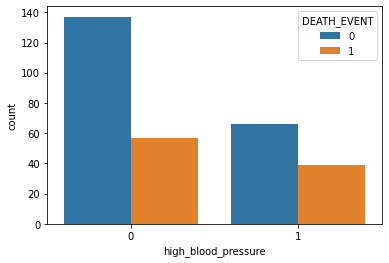

In [10]:
sns.countplot(x='high_blood_pressure', hue='DEATH_EVENT', data=df)

In [11]:
df.shape

(299, 13)

In [12]:
x = df.drop('DEATH_EVENT', axis=1)

In [13]:
y = df['DEATH_EVENT']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# train = 70%
# test = 30%
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.30, random_state=42) # train_size=.70

In [16]:
xtrain.shape

(209, 12)

In [17]:
df.shape

(299, 13)

In [18]:
xtest.shape

(90, 12)

In [19]:
xtrain

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
224,58.000,0,582,1,25,0,504000.00,1.0,138,1,0,205
68,70.000,0,161,0,25,0,244000.00,1.2,142,0,0,66
222,42.000,1,86,0,35,0,365000.00,1.1,139,1,1,201
37,82.000,1,855,1,50,1,321000.00,1.0,145,0,0,30
16,87.000,1,149,0,38,0,262000.00,0.9,140,1,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...
188,60.667,1,151,1,40,1,201000.00,1.0,136,0,0,172
71,58.000,0,582,1,35,0,122000.00,0.9,139,1,1,71
106,55.000,0,748,0,45,0,263000.00,1.3,137,1,0,88
270,44.000,0,582,1,30,1,263358.03,1.6,130,1,1,244


In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
clf = DecisionTreeClassifier()

In [22]:
clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [23]:
pred = clf.predict(xtest) # predicted y for testing val
pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [24]:
len(pred)

90

In [25]:
import numpy as np
np.array(ytest) # actual ytest

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

In [26]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, plot_roc_curve

In [27]:
classification_report(ytest, pred)

'              precision    recall  f1-score   support\n\n           0       0.68      0.79      0.73        53\n           1       0.61      0.46      0.52        37\n\n    accuracy                           0.66        90\n   macro avg       0.64      0.63      0.63        90\nweighted avg       0.65      0.66      0.65        90\n'

In [28]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73        53
           1       0.61      0.46      0.52        37

    accuracy                           0.66        90
   macro avg       0.64      0.63      0.63        90
weighted avg       0.65      0.66      0.65        90



In [29]:
cm = confusion_matrix(ytest, pred)

In [30]:
cm

array([[42, 11],
       [20, 17]], dtype=int64)

In [31]:
(58+15) / (58+15+11+6)

0.8111111111111111

In [32]:
clf.score(xtest, ytest)

0.6555555555555556

In [33]:
accuracy_score(ytest, pred)

0.6555555555555556

In [34]:
tp, fn, fp, tn = confusion_matrix(ytest, pred).reshape(-1)

In [35]:
tp

42

In [36]:
fn

11

In [37]:
fp

20

In [38]:
tn

17

In [39]:
(tp+tn) / (tp+tn+fp+fn)

0.6555555555555556

<AxesSubplot:>

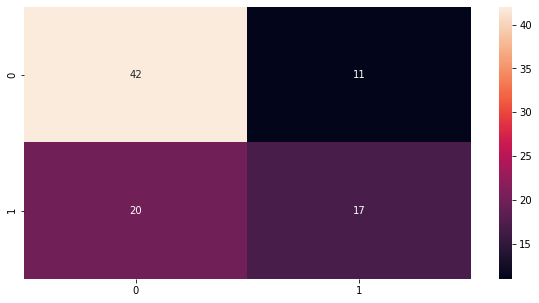

In [40]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True)

In [41]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<AxesSubplot:>

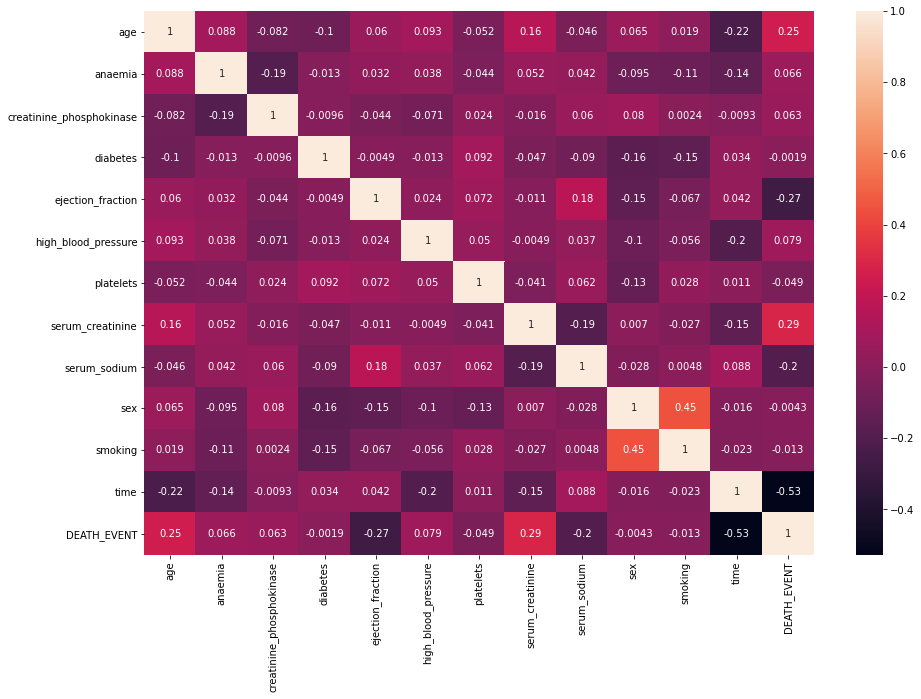

In [42]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

# ROC

Receiver Operating Characteristic (ROC): Since, TPR is equivalent to Sensitivity and FPR is equal to 1 − specificity, the ROC graph is sometimes called the sensitivity vs (1 − specificity) plot.


C:\Users\Study Mart\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


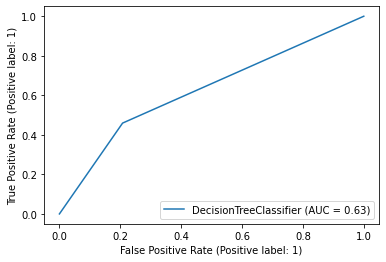

In [43]:
plot_roc_curve(clf, xtest, ytest)

C:\Users\Study Mart\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


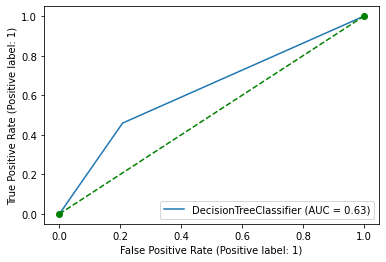

In [44]:
plot_roc_curve(clf, xtest, ytest)
plt.plot([0,1],[0,1],'go--')

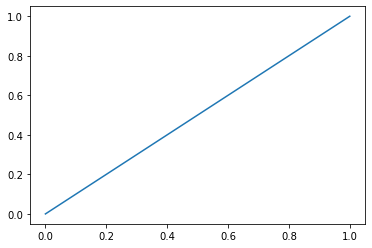

In [45]:
plt.plot([0,1],[0,1])

# Precision or Positive Predictive Value (PPV)
